# Pandas で 表を扱い、Seaborn で可視化する
- Pandas: "Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language." https://pandas.pydata.org/docs/index.html
- Seaborn: "Seaborn is a library for making statistical graphics in Python." https://seaborn.pydata.org/tutorial/introduction

In [55]:
# pandas は pd としてインポートされることが多い
import pandas as pd

# seaborn は sns (seaborn name space) としてインポートされることが多い
import seaborn as sns

import matplotlib.pyplot as plt

## Google colaboratory でのデータの読み込み
- 通常は、左にある「ファイル」の下にデータをドラッグ & ドロップする
- そうすると、/content/ファイル名 でアクセスできる
- 今は、データをダウンロードして使用する

In [23]:
# 本日使うデータをダウンロードする
# ファイル名は cobre_142.csv
# ! はPythonからシェルで動かすプログラムを実行したい時につける
# [[ -f cobre_142.csv ]] は、「cobre_142.csv というファイルがあるか？」というテスト文
# || は、戻り値が False ならば…　というコマンド
# wget はダウンロードするLinuxのプログラム

![[ -f cobre_142.csv ]] || wget https://raw.githubusercontent.com/kytk/AI-MAILs/main/cobre_142.csv


## Pandas の用語: 「データフレーム Data Frame」
- 一般的な表をイメージすればよい
- Pandasでは、ひとつの表を「データフレーム」と呼ぶ
- 行: row; 列: column
- dataframe から df という変数に代入されることが多い

## Pandas へのデータの読み込み
- Pandas は、csvファイルやexcelファイルを読み込むことができる
- Excelファイルはいくつか追加パッケージが必要なことがあるため、csvファイルがおすすめ
- csvファイルに日本語が入っている場合、文字コードをUTF-8にすることがおすすめ
- Excel は、`pd.read_excel('excelファイル')` で読み込むことができる
- CSVは、`pd.read_csv('csvファイル')` で読み込むことができる

In [11]:
# pd.read_csv を使用する
# 1列目はIDのようなインデックスの場合、'index_col=0' と指定する
df = pd.read_csv('/content/cobre_142.csv', index_col=0)

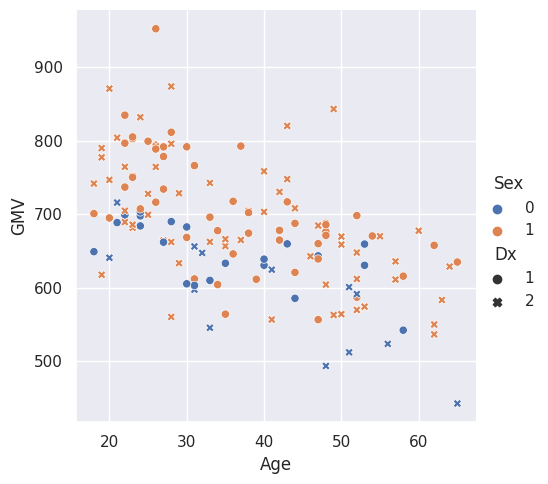

In [91]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('/content/cobre_142.csv', index_col=0)
sns.set_theme()
sns.relplot(data=df, x="Age", y="GMV", hue="Sex",style="Dx")

In [93]:
df.head()

,Age,Dx,Sex,GMV,WMV,CSF,ICV
ID,,,,,,,
sub-40000,20,2,0,640.99,431.95,289.0,1361.94
sub-40001,27,2,1,664.49,463.15,207.6,1335.24
sub-40002,19,2,1,617.81,418.59,281.2,1317.60
sub-40003,28,2,1,874.19,573.03,293.5,1740.72
sub-40004,55,2,1,670.24,488.44,477.5,1636.18


In [109]:
df.loc['sub-40037','CSF']=408.3


In [112]:
df.loc['sub-40037','ICV'] -= 1000

In [113]:
df.loc['sub-40037']['ICV']

1545.1999999999998

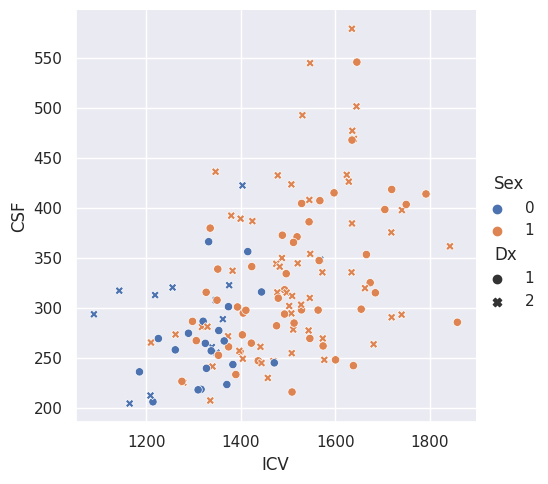

In [117]:
sns.relplot(data=df, x="ICV", y="CSF",hue="Sex",style="Dx")

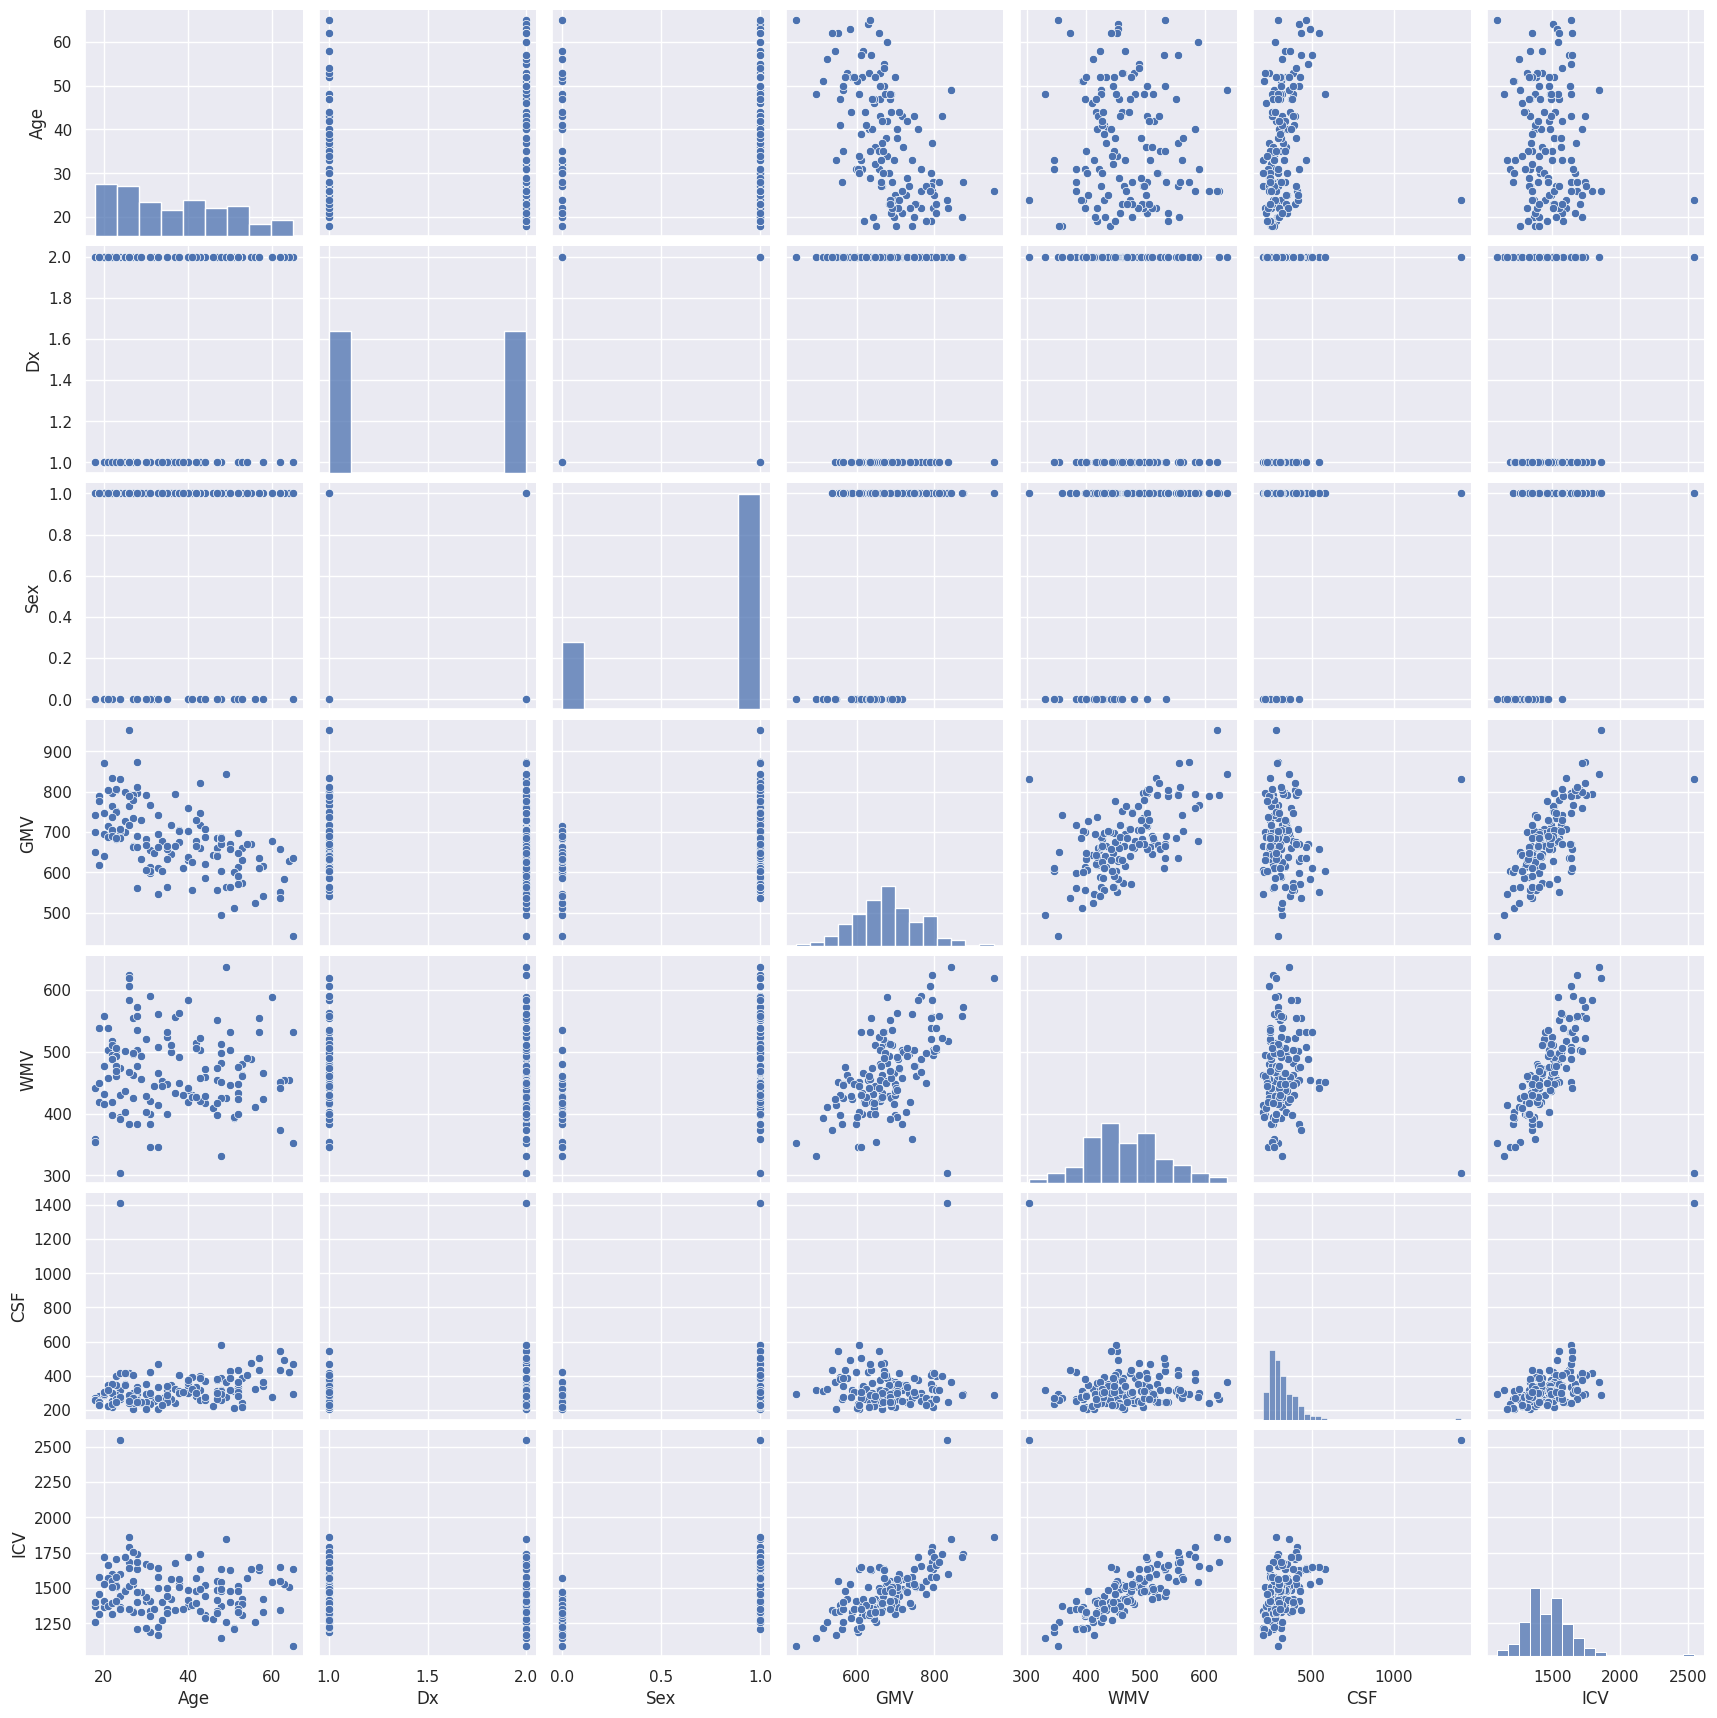

In [92]:
sns.pairplot(df)

In [27]:
# df.head() でデータの最初の5行を確認できる
df.head()

,Age,Dx,Sex,GMV,WMV,CSF,ICV
ID,,,,,,,
sub-40000,20,2,0,640.99,431.95,289.0,1361.94
sub-40001,27,2,1,664.49,463.15,207.6,1335.24
sub-40002,19,2,1,617.81,418.59,281.2,1317.60
sub-40003,28,2,1,874.19,573.03,293.5,1740.72
sub-40004,55,2,1,670.24,488.44,477.5,1636.18


In [119]:
df.shape

(142, 7)

In [120]:
df.index

Index(['sub-40000', 'sub-40001', 'sub-40002', 'sub-40003', 'sub-40004',
       'sub-40005', 'sub-40006', 'sub-40007', 'sub-40008', 'sub-40009',
       ...
       'sub-40138', 'sub-40139', 'sub-40140', 'sub-40141', 'sub-40142',
       'sub-40143', 'sub-40144', 'sub-40145', 'sub-40146', 'sub-40147'],
      dtype='object', name='ID', length=142)

In [33]:
# カラム名を使ってデータの一部を抽出できる
# Age のみ抜き出したかったら df['Age']
df['Age']

ID
sub-40000    20
sub-40001    27
sub-40002    19
sub-40003    28
sub-40004    55
             ..
sub-40143    52
sub-40144    54
sub-40145    19
sub-40146    39
sub-40147    34
Name: Age, Length: 142, dtype: int64

In [36]:
# 複数の項目を抜き出したかったら、まず、項目をリストとして作成して、
# df[リスト] とすればよい
# Age と GMV を抜き出したかったら、まず、['Age', 'GMV'] というリストを作る
# そのリストを df[] の中に入れる
# a = ['Age','GMV']
# df[a]

df[['Age','GMV']]

,Age,GMV
ID,,
sub-40000,20,640.99
sub-40001,27,664.49
sub-40002,19,617.81
sub-40003,28,874.19
sub-40004,55,670.24
...,...,...
sub-40143,52,648.10
sub-40144,54,670.65
sub-40145,19,777.67


In [48]:
# データフレームの記述統計は、describe() で求められる
df.describe()

,Age,Dx,Sex,GMV,WMV,CSF,ICV
count,142.000000,142.00000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,36.908451,1.50000,0.760563,680.012676,467.151972,324.654930,1471.819577
std,12.909343,0.50177,0.428250,84.359181,63.130973,118.105636,175.876330
min,18.000000,1.00000,0.000000,442.600000,304.580000,204.600000,1088.780000
25%,26.000000,1.00000,1.000000,629.467500,425.027500,262.625000,1350.025000
50%,35.000000,1.50000,1.000000,675.505000,460.135000,300.100000,1473.015000
75%,48.000000,2.00000,1.000000,730.130000,505.610000,356.025000,1567.152500
max,65.000000,2.00000,1.000000,952.710000,637.760000,1408.300000,2545.200000


In [44]:
# データフレームの平均は mean() メソッドで簡単に求められる
df.mean()

Age      36.908451
Dx        1.500000
Sex       0.760563
GMV     680.012676
WMV     467.151972
CSF     324.654930
ICV    1471.819577
dtype: float64

In [45]:
df.median()

Age      35.000
Dx        1.500
Sex       1.000
GMV     675.505
WMV     460.135
CSF     300.100
ICV    1473.015
dtype: float64

In [46]:
# ある列の平均は、その列だけ取り出して mean() メソッドで簡単に求められる
df['Age'].mean()

36.90845070422535

In [47]:
# 複数の列の平均も一度に求められる
df[['Age','GMV']].mean()

Age     36.908451
GMV    680.012676
dtype: float64

In [40]:
df.mean()

Age      36.908451
Dx        1.500000
Sex       0.760563
GMV     680.012676
WMV     467.151972
CSF     324.654930
ICV    1471.819577
dtype: float64

In [43]:
df.std()

Age     12.909343
Dx       0.501770
Sex      0.428250
GMV     84.359181
WMV     63.130973
CSF    118.105636
ICV    175.876330
dtype: float64

In [66]:
df.pivot(columns='Dx',values='GMV')

Dx,1,2
ID,,
sub-40000,NaN,640.99
sub-40001,NaN,664.49
sub-40002,NaN,617.81
sub-40003,NaN,874.19
sub-40004,NaN,670.24
...,...,...
sub-40143,NaN,648.10
sub-40144,670.65,NaN
sub-40145,NaN,777.67


In [68]:
df.describe()


,Age,Dx,Sex,GMV,WMV,CSF,ICV
count,142.000000,142.00000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,36.908451,1.50000,0.760563,680.012676,467.151972,324.654930,1471.819577
std,12.909343,0.50177,0.428250,84.359181,63.130973,118.105636,175.876330
min,18.000000,1.00000,0.000000,442.600000,304.580000,204.600000,1088.780000
25%,26.000000,1.00000,1.000000,629.467500,425.027500,262.625000,1350.025000
50%,35.000000,1.50000,1.000000,675.505000,460.135000,300.100000,1473.015000
75%,48.000000,2.00000,1.000000,730.130000,505.610000,356.025000,1567.152500
max,65.000000,2.00000,1.000000,952.710000,637.760000,1408.300000,2545.200000


In [77]:
# 年齢が40歳より上を取り出したい
#df[df['Age'] >40]
df['Age']>40


ID
sub-40000    False
sub-40001    False
sub-40002    False
sub-40003    False
sub-40004     True
             ...  
sub-40143     True
sub-40144     True
sub-40145    False
sub-40146    False
sub-40147    False
Name: Age, Length: 142, dtype: bool

In [78]:
df[df['Age']>40]

,Age,Dx,Sex,GMV,WMV,CSF,ICV
ID,,,,,,,
sub-40004,55,2,1,670.24,488.44,477.5,1636.18
sub-40005,48,2,0,493.73,331.22,317.5,1142.45
sub-40006,53,2,1,574.42,462.95,387.1,1424.47
sub-40007,65,2,0,442.60,352.28,293.9,1088.78
sub-40010,52,2,1,612.18,433.00,337.4,1382.58
sub-40015,47,2,1,684.82,551.08,310.2,1546.10
sub-40016,49,2,1,563.09,425.02,273.7,1261.81
sub-40018,47,1,1,660.19,454.81,373.0,1488.00
sub-40019,44,1,1,687.82,459.96,371.4,1519.18


In [70]:
#行を取り出したいときはloc/ilocを使う location based indexer
# 2行目を取り出したい時
df.iloc[1,:]

Age      27.00
Dx        2.00
Sex       1.00
GMV     664.49
WMV     463.15
CSF     207.60
ICV    1335.24
Name: sub-40001, dtype: float64

In [72]:
# 3行目から5行目を取り出したい
df.iloc[2:5,:]

,Age,Dx,Sex,GMV,WMV,CSF,ICV
ID,,,,,,,
sub-40002,19,2,1,617.81,418.59,281.2,1317.60
sub-40003,28,2,1,874.19,573.03,293.5,1740.72
sub-40004,55,2,1,670.24,488.44,477.5,1636.18


In [ ]:
# groupby メソッドで、グループ毎の統計量を簡単に見られる。
df0.groupby(by='Gender').describe()['TBV']

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
1,108.0,1181.007685,124.201079,910.03,1099.7000,1168.40,1251.325,1572.9
2,34.0,1039.657647,94.346283,794.88,984.5675,1059.05,1092.625,1225.6


In [ ]:
df0.groupby(by=['Gender','Type']).mean()['TBV']

Gender  Type
1       1       1191.220400
        2       1172.203621
2       1       1066.550952
        2        996.214615
Name: TBV, dtype: float64

In [ ]:
df0.groupby(by=['Gender','Type']).size()

Gender  Type
1       1       50
        2       58
2       1       21
        2       13
dtype: int64

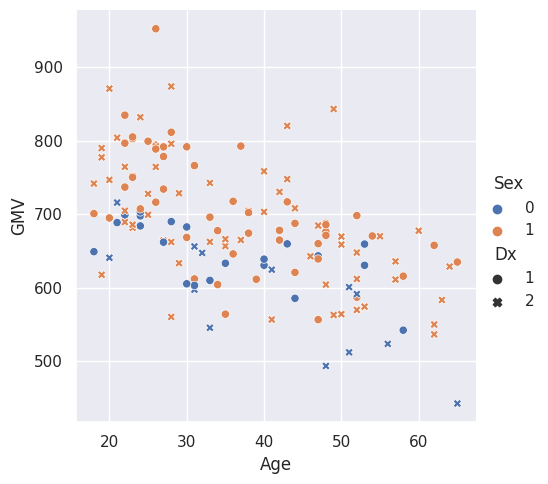

In [89]:
sns.set_theme()
sns.relplot(
    data=df,
    x="Age", y="GMV", hue="Sex",style="Dx")

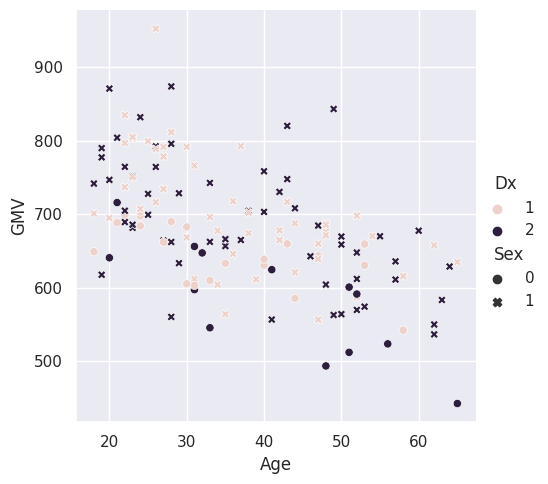

In [90]:
sns.relplot(
    data=df,
    x="Age", y="GMV", hue="Dx",style="Sex")